# 📊 PART 2: Exploratory Data Analysis (EDA)
In this notebook, we’ll:
- Do a quick data overview
- Perform univariate analysis (one feature at a time)
- Do bivariate analysis (relationship between features)
- Create some beautiful visuals with Seaborn and Matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("C:/Users/manav/Desktop/cleaned_data.csv")
df.head()



,flightnumber,date,boosterversion,payloadmass,orbit,launchsite,outcome,flights,gridfins,reused,legs,landingpad,block,reusedcount,serial,longitude,latitude
0,1,6/4/2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857
1,2,5/22/2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857
2,3,3/1/2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857
3,4,9/29/2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093
4,5,12/3/2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857


## 🔎 Basic Dataset Info
Check shape, data types, and summary statistics.

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flightnumber    90 non-null     int64  
 1   date            90 non-null     object 
 2   boosterversion  90 non-null     object 
 3   payloadmass     90 non-null     float64
 4   orbit           90 non-null     object 
 5   launchsite      90 non-null     object 
 6   outcome         90 non-null     object 
 7   flights         90 non-null     int64  
 8   gridfins        90 non-null     bool   
 9   reused          90 non-null     bool   
 10  legs            90 non-null     bool   
 11  landingpad      79 non-null     object 
 12  block           90 non-null     int64  
 13  reusedcount     90 non-null     int64  
 14  serial          90 non-null     object 
 15  longitude       90 non-null     float64
 16  latitude        90 non-null     float64
dtypes: bool(3), float64(3), int64(4), obj

,flightnumber,payloadmass,flights,block,reusedcount,longitude,latitude
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6123.547647,1.788889,3.500000,3.188889,-86.366477,29.449963
std,26.124701,4732.115291,1.213172,1.595288,4.194417,14.149518,2.141306
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857
75%,67.750000,8912.750000,2.000000,5.000000,4.000000,-80.577366,28.608058
max,90.000000,15600.000000,6.000000,5.000000,13.000000,-80.577366,34.632093


## 📊 Univariate Analysis
Let's look at how individual features are distributed.


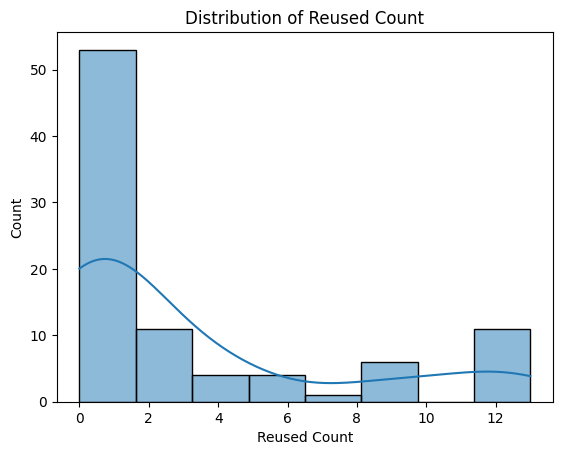

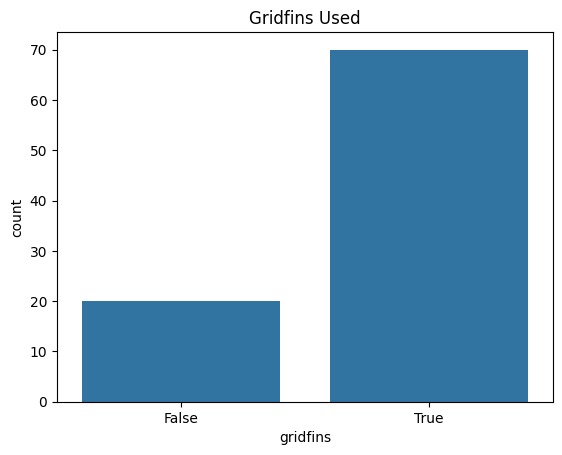

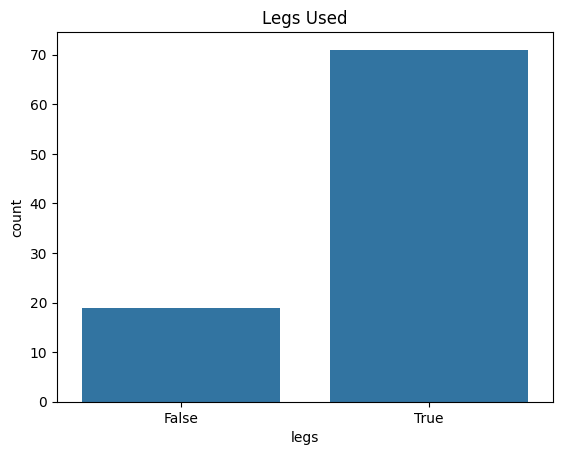

In [8]:
# Histogram: Reused Count
sns.histplot(df['reusedcount'], kde=True)
plt.title('Distribution of Reused Count')
plt.xlabel('Reused Count')
plt.show()

# Countplot: Gridfins (yes/no)
sns.countplot(x='gridfins', data=df)
plt.title('Gridfins Used')
plt.show()

# Countplot: Legs (yes/no)
sns.countplot(x='legs', data=df)
plt.title('Legs Used')
plt.show()


## 🔁 Bivariate Analysis
Understand relationships between features.


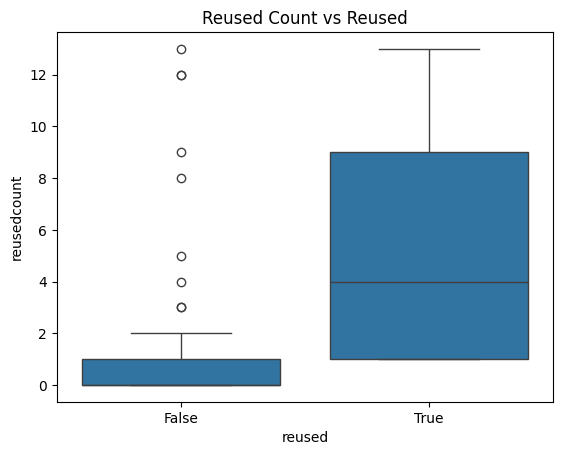

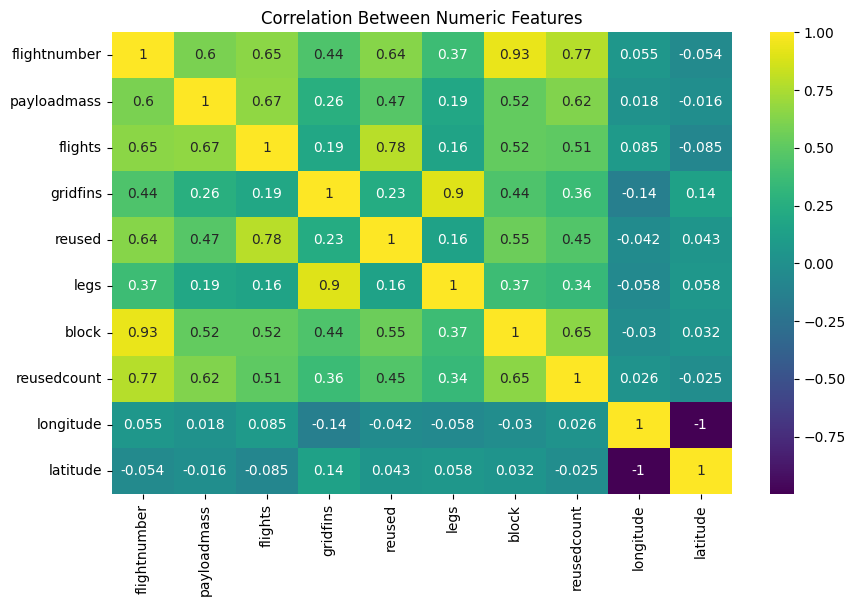

In [9]:
# Boxplot: Reused Count vs Reused (binary/categorical)
sns.boxplot(x='reused', y='reusedcount', data=df)
plt.title('Reused Count vs Reused')
plt.show()

# Correlation Heatmap (for numeric fields)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title('Correlation Between Numeric Features')
plt.show()


## 🌍 Location Visualization (Latitude & Longitude Scatter)
To see distribution of launch landings


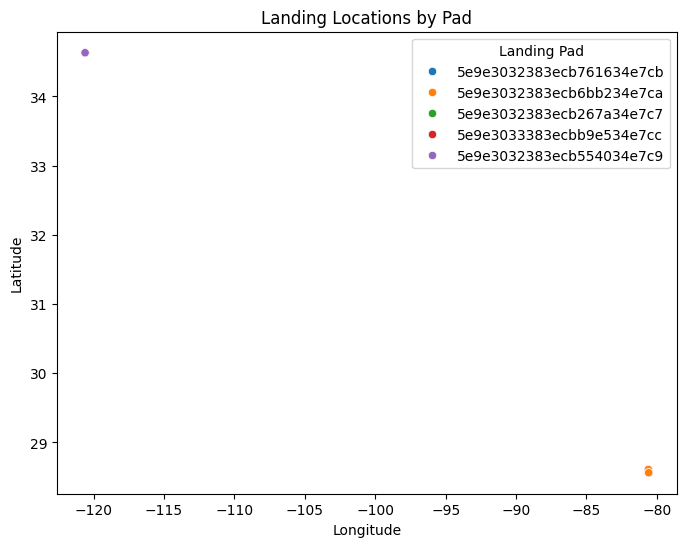

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='longitude', y='latitude', hue='landingpad', data=df)
plt.title('Landing Locations by Pad')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Landing Pad')
plt.show()
